In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv("StudentsPerformance.csv")

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



## VARIABLE DESCRIPTIONS:

1) gender: specifies gender of the student(male/female)

2) race: specifies race of the student(group A,group B,group C)

3) parental level of education: specifies highest educational qualification of any parent of each student

4) lunch_type: standard/reduced,the type of lunch package selected for the student

5) test_prep: specifies if the test preparation course was completed by the student or not

6) math_score: specifies score in math(our target variable)

7) reading_score: specifies score in reading

8) writing_score: specifies score in writing

All scores are taken out of 100.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [28]:
!pip install fast_ml
from fast_ml import eda
from fast_ml.utilities import display_all

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
summary_df = eda.df_info(df)
display_all(summary_df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
gender,object,Categorical,2,"[female, male]",0,0.0
race/ethnicity,object,Categorical,5,"[group B, group C, group A, group D, group E]",0,0.0
parental level of education,object,Categorical,6,"[bachelor's degree, some college, master's deg...",0,0.0
lunch,object,Categorical,2,"[standard, free/reduced]",0,0.0
test preparation course,object,Categorical,2,"[none, completed]",0,0.0
math score,int64,Numerical,81,"[72, 69, 90, 47, 76, 71, 88, 40, 64, 38]",0,0.0
reading score,int64,Numerical,72,"[72, 90, 95, 57, 78, 83, 43, 64, 60, 54]",0,0.0
writing score,int64,Numerical,77,"[74, 88, 93, 44, 75, 78, 92, 39, 67, 50]",0,0.0


In [30]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [33]:
columns1={'gender':'gender','race/ethnicity':'race','parental level of education':'parent_ed_level','lunch':'lunch_type','test preparation course':'test_prep','math score':'math','reading score':'reading','writing score':'writing'}
df.rename(columns=columns1,inplace=True)



In [34]:
df['total']=df['math']+df['reading']+df['writing']

In [35]:
df.head()

,gender,race,parent_ed_level,lunch_type,test_prep,math,reading,writing,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [36]:
df['parent_ed_level']=df['parent_ed_level'].replace(['some high school'],'high school')
df['parent_ed_level'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

In [37]:
df['lunch_type']=df['lunch_type'].replace(['free/reduced'],'reduced')
df['lunch_type'].unique()

array(['standard', 'reduced'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c5a86b810>,
      dtype=object)

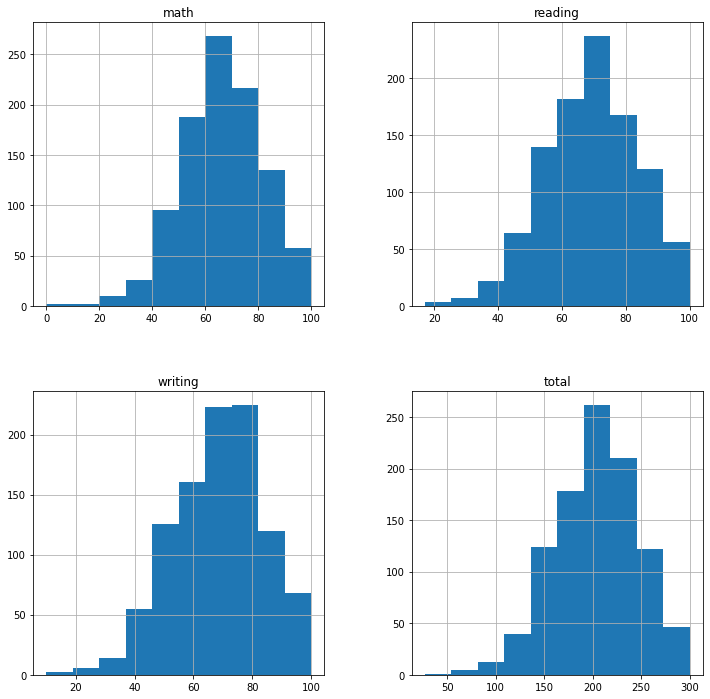

In [38]:
df[['math','reading','writing','total']].hist(figsize=(12,12))

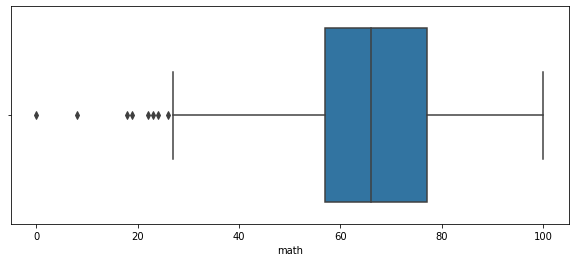

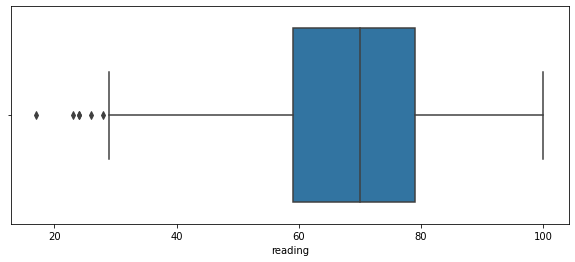

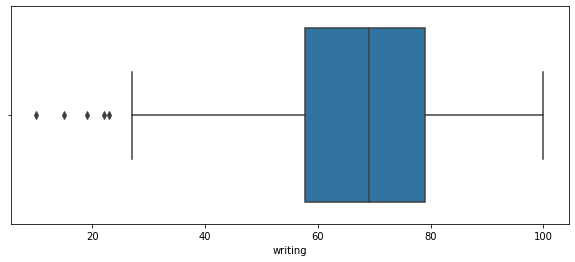

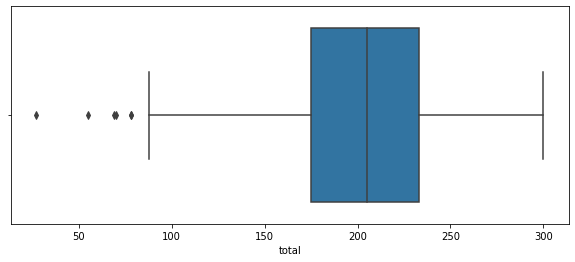

In [39]:
def boxplot(column,dataf):
    plt.figure(figsize=(10,4))
    sns.boxplot(x=column,data=dataf)

score=['math','reading','writing','total']
for i in score:
    boxplot(i,df)




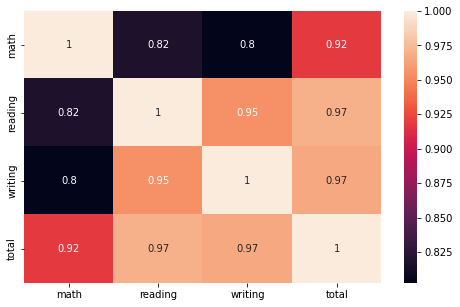

In [41]:
corr_matrix=df[score].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True)

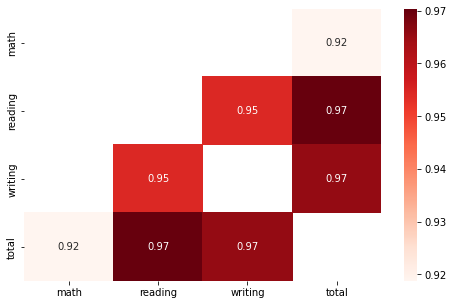

In [44]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .9) | (dfCorr <= -.9)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,5))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

dropping total for having really high correlation with everything

In [51]:
df_new=df.copy()

In [52]:
df_new.drop(['total'],inplace=True,axis=1)

In [53]:
df_new.head()

,gender,race,parent_ed_level,lunch_type,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Figure size 864x360 with 0 Axes>

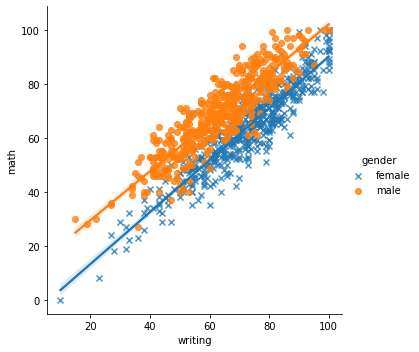

<Figure size 864x360 with 0 Axes>

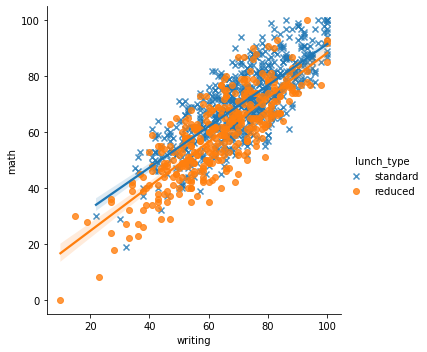

<Figure size 864x360 with 0 Axes>

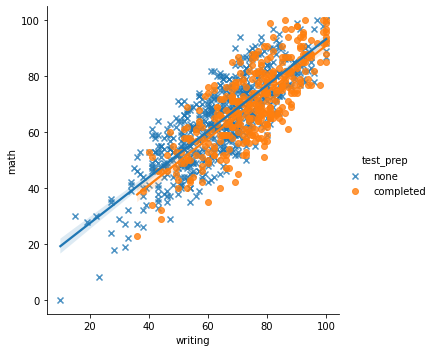

In [56]:
hue_list=['gender','lunch_type','test_prep']
for hue in hue_list:
    plt.figure(figsize=(12,5))
    sns.lmplot(x='writing',y='math',data=df_new,hue=hue,fit_reg=True,markers=['x','o'])

In [60]:
##encoding categorical data
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
cat_list=['gender','race','lunch_type','parent_ed_level']
for col in cat_list:
    df_new[col]=label.fit_transform(df_new[col])



In [61]:
df_new.head()

,gender,race,parent_ed_level,lunch_type,test_prep,math,reading,writing
0,0,1,1,1,none,72,72,74
1,0,2,4,1,completed,69,90,88
2,0,1,3,1,none,90,95,93
3,1,0,0,0,none,47,57,44
4,1,2,4,1,none,76,78,75


In [64]:
pred = df['total']
df_new['math']=df_new['math']/100.0
df_new['reading']=df_new['reading']/100.0
df_new['writing']=df_new['writing']/100.0
pred=pred/100.0

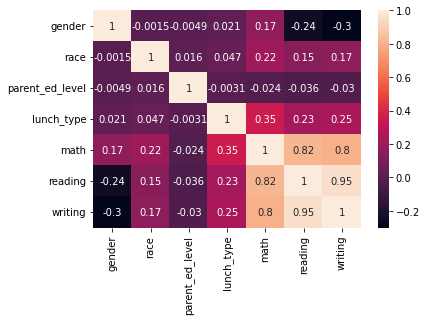

In [66]:
corr_matrix=df_new.corr()
sns.heatmap(corr_matrix,annot=True)

In [71]:
##math and writing need to be dropped because of the high correlation

KeyError: ignored

In [76]:
writingdf = df_new['writing']
df_new.drop(['writing'],inplace=True,axis=1)

In [79]:
df_new.head()

,gender,race,parent_ed_level,lunch_type,test_prep,reading
0,0,1,1,1,none,0.000072
1,0,2,4,1,completed,0.000090
2,0,1,3,1,none,0.000095
3,1,0,0,0,none,0.000057
4,1,2,4,1,none,0.000078


In [86]:
from sklearn import metrics
from sklearn.metrics import r2_score
import sklearn
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [82]:
##regression function
def reg_metrics(actual,predicted):
    mae=metrics.mean_absolute_error(actual,predicted)
    mse=metrics.mean_squared_error(actual,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(actual,predicted))
    r2=r2_score(actual,predicted)
    print("MAE:",mae)
    print("MSE:",mse)
    print("RMSE:",rmse)
    print("R2:",r2)

In [83]:
##residual plotting func
def residual_plot(actual,predicted):
    plt.figure(figsize=(10,6))
    plt.xlabel('Residual error value')
    plt.title('Residual Plot',size=13)
    plt.hist(actual-predicted)

## Linear Regression

In [94]:
df_new.drop(['test_prep'],axis=1,inplace=True)
## to avoid object datatype feature

In [103]:
X_train, X_holdout, y_train, y_holdout = train_test_split(df_new.values,math,test_size=0.3,random_state=17)
reg=LinearRegression(normalize=True)
reg.fit(X_train,y_train)
predict=reg.predict(X_holdout)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [104]:
coef_df = pd.DataFrame(reg.coef_, df_new.columns, columns=['coefficients'])
coef_df

,coefficients
gender,1.141645e-05
race,1.050553e-06
parent_ed_level,1.231278e-07
lunch_type,4.200626e-06
reading,8.821059e-01


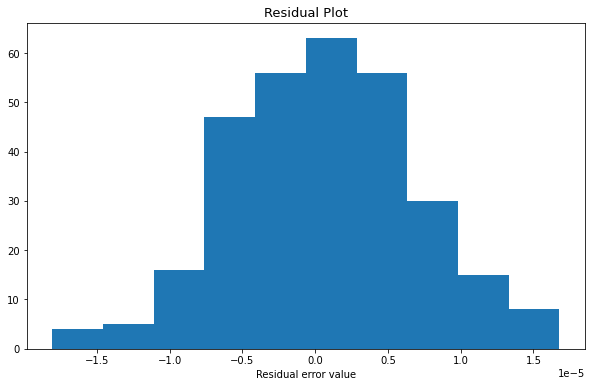

In [106]:
residual_plot(y_holdout,predict)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


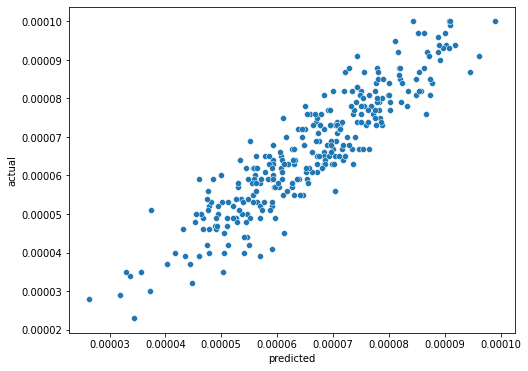

In [107]:
plt.figure(figsize=(8,6))
plt.xlabel('predicted')
plt.ylabel('actual')
sns.scatterplot(predict,y_holdout)

In [108]:
reg_metrics(y_holdout,predict)

MAE: 5.105437080635657e-06
MSE: 4.043699097831911e-11
RMSE: 6.359008647448053e-06
R2: 0.8336765595537287
